# TFM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)

In [3]:
datos1 = pd.read_csv("/home/michael/Kschool/TFM/Importe_Taxi/2018_Green_Taxi_Trip_Data.csv")

In [4]:
datos1.shape

(8807303, 19)

# Extrayendo muestra

In [5]:
datos1["key"] = range(datos1.shape[0])

In [6]:
from random import sample
total = list(datos1["key"])
muestra = sample(total,round(datos1.shape[0]*0.1))

In [7]:
datos_sample = datos1.loc[muestra]

In [8]:
datos_sample.shape

(880730, 20)

In [9]:
datos_sample.to_csv("/home/michael/Kschool/TFM/Importe_Taxi/datos_TFM.csv",index = False)

# Limpiando datos

In [9]:
datos_sample["lpep_pickup_datetime"] = pd.to_datetime(datos_sample["lpep_pickup_datetime"])
datos_sample["lpep_dropoff_datetime"] = pd.to_datetime(datos_sample["lpep_dropoff_datetime"])

In [10]:
datos_sample["dayofweek"] = datos_sample["lpep_pickup_datetime"].dt.dayofweek

In [11]:
datos_sample["dayofmonth"] = datos_sample["lpep_pickup_datetime"].dt.day

In [12]:
datos_sample["month"] = datos_sample["lpep_pickup_datetime"].dt.month

In [13]:
datos_sample["hora_pickup"] = datos_sample["lpep_pickup_datetime"].dt.hour * 3600
datos_sample["minute_pickup"] = datos_sample["lpep_pickup_datetime"].dt.minute * 60
datos_sample["second_pickup"] = datos_sample["lpep_pickup_datetime"].dt.second

datos_sample["hora_dropoff"] = datos_sample["lpep_dropoff_datetime"].dt.hour * 3600
datos_sample["minute_dropoff"] = datos_sample["lpep_dropoff_datetime"].dt.minute * 60
datos_sample["second_dropoff"] = datos_sample["lpep_dropoff_datetime"].dt.second

In [14]:
datos_sample["time_pickup"] = datos_sample["hora_pickup"] + datos_sample["minute_pickup"] + datos_sample["second_pickup"]
datos_sample["time_dropoff"] = datos_sample["hora_dropoff"] + datos_sample["minute_dropoff"] + datos_sample["second_dropoff"]

In [15]:
datos_sample["time_duration"] = datos_sample["time_dropoff"] - datos_sample["time_pickup"]

In [16]:
datos_sample["hora_pickup"] = datos_sample["hora_pickup"] / 3600

In [17]:
flag = []
for value in datos_sample["store_and_fwd_flag"]:
    if value == "N":
        flag.append(0)
    else:
        flag.append(1)

datos_sample["store_and_fwd_flag"] = flag

In [18]:
datos_sample["time_duration"].describe()

count    880730.000000
mean        216.309509
std        7537.267374
min      -86382.000000
25%         377.000000
50%         650.000000
75%        1117.000000
max       86119.000000
Name: time_duration, dtype: float64

In [19]:
datos_sample = datos_sample[datos_sample["time_duration"] > 0]
datos_sample = datos_sample[datos_sample["time_duration"] <= 10800]

In [20]:
datos_sample.shape

(868910, 32)

(array([   942.,   2362.,   3157.,   3714.,   8873.,  87066., 329517.,
        327983.,  99153.,   6143.]),
 array([0.        , 0.92761281, 1.85522562, 2.78283843, 3.71045125,
        4.63806406, 5.56567687, 6.49328968, 7.42090249, 8.3485153 ,
        9.27612811]),
 <a list of 10 Patch objects>)

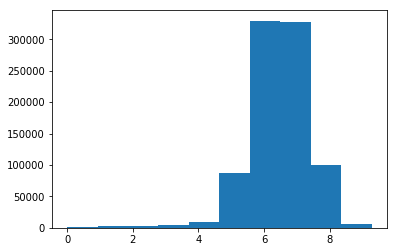

In [21]:
plt.hist(np.log(datos_sample["time_duration"]))

In [ ]:
#location_pickup = pd.read_csv("/home/michael/Kschool/TFM/Importe_Taxi/taxi_zone_lookup.csv")
#location_pickup.columns = ["PULocationID","borough_pickup","zone_pickup","service_zone_pickup"]
#location_dropoff = pd.read_csv("/home/michael/Kschool/TFM/Importe_Taxi/taxi_zone_lookup.csv")
#location_dropoff.columns = ["DOLocationID","borough_dropoff","zone_dropoff","service_zone_dropoff"]

In [ ]:
#datos_sample1 = datos_sample.merge(location_pickup)
#datos_sample1 = datos_sample1.merge(location_dropoff)

In [23]:
datos_sample2 = datos_sample[["key","VendorID","store_and_fwd_flag","RatecodeID","PULocationID","DOLocationID","passenger_count","trip_distance",
                              "payment_type","trip_type","hora_pickup","time_duration","dayofweek","dayofmonth","month","total_amount"]]
#"borough_pickup","borough_dropoff","zone_pickup","zone_dropoff"

In [24]:
datos_sample2.isnull().sum()

key                   0
VendorID              0
store_and_fwd_flag    0
RatecodeID            0
PULocationID          0
DOLocationID          0
passenger_count       0
trip_distance         0
payment_type          0
trip_type             0
hora_pickup           0
time_duration         0
dayofweek             0
dayofmonth            0
month                 0
total_amount          0
dtype: int64

In [30]:
datos_sample2.head()

key  VendorID  store_and_fwd_flag  RatecodeID  PULocationID  \
3508946  3508946         2                   0           1            28   
1824374  1824374         2                   0           1            75   
540119    540119         2                   0           1            75   
1138804  1138804         2                   0           1           192   
6067477  6067477         2                   0           1           225   

         DOLocationID  passenger_count  trip_distance  payment_type  \
3508946            82                1           3.20             2   
1824374            74                1           0.83             2   
540119            239                1           2.10             2   
1138804           173                1           2.64             2   
6067477            97                1           2.39             1   

         trip_type  hora_pickup  time_duration  dayofweek  dayofmonth  month  \
3508946        1.0         13.0            779          5          12      5   
1824374        1.0         13.0            182          5          10      3   
540119         1.0         14.0            503          0          22      1   
1138804        1.0         13.0            680          1          13      2   
6067477        1.0          8.0            955          4          31      8   

         total_amount  
3508946          13.8  
1824374           5.3  
540119            9.3  
1138804          11.3  
6067477          12.8

In [89]:
datos_sample2["total_amount"].describe()

count    868910.000000
mean         15.700240
std          16.751209
min        -147.000000
25%           8.300000
50%          11.800000
75%          18.800000
max       10528.750000
Name: total_amount, dtype: float64

In [74]:
datos_sample3 = datos_sample2[datos_sample2["total_amount"] > 1]
datos_sample3 = datos_sample3[datos_sample3["total_amount"] <= 100]

# Escalando variables

In [26]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()

In [31]:
datos_sample2.columns

Index(['key', 'VendorID', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'passenger_count', 'trip_distance', 'payment_type',
       'trip_type', 'hora_pickup', 'time_duration', 'dayofweek', 'dayofmonth',
       'month', 'total_amount'],
      dtype='object')

In [104]:
X_num = datos_sample3.drop(["key","trip_distance","time_duration","total_amount"],axis = 1)
X_scaled = rbs.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ['VendorID', 'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'payment_type',
                    'trip_type', 'hora_pickup', 'dayofweek', 'dayofmonth', 'month']

In [106]:
X = X_scaled
y = datos_sample3["total_amount"]

(array([403215., 286826.,  94222.,  38897.,  18977.,  11263.,   6154.,
          2936.,   1299.,    595.]),
 array([  1.3 ,  11.17,  21.04,  30.91,  40.78,  50.65,  60.52,  70.39,
         80.26,  90.13, 100.  ]),
 <a list of 10 Patch objects>)

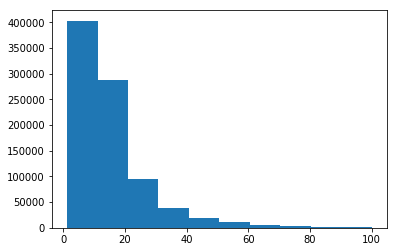

In [77]:
plt.hist(datos_sample3["total_amount"])

# Particion train-test

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

# Modelo

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [108]:
mod_rf = rf.fit(X_train,y_train)

In [109]:
pred_rf = mod_rf.predict(X_test)

# Metricas de modelo

In [110]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_rf)

3.6459489622335233

In [111]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_rf)

25.11863387755916

In [112]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test(y_test,pred_rf)

0.8343890260466227

# Importancia de variables

In [113]:
feature_importances = pd.DataFrame(mod_rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

In [114]:
feature_importances

importance
PULocationID          0.336820
DOLocationID          0.320388
payment_type          0.084996
hora_pickup           0.061242
RatecodeID            0.053019
dayofmonth            0.052448
month                 0.039602
dayofweek             0.032337
passenger_count       0.011225
VendorID              0.006887
trip_type             0.000826
store_and_fwd_flag    0.000210

# Graficando las zonas

In [5]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pysal as ps

import pandas as pd
import numpy as np

/usr/local/lib/python3.6/dist-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


# Opcion 1

In [24]:
datos_mapa_shp = gpd.read_file("/home/michael/Kschool/TFM/Importe_Taxi/taxi_zones/taxi_zones.shp")

In [25]:
datos_mapa_shp.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.9183527103 192536.0856972019,...  
1         Queens  (POLYGON ((1033269.243591294 172126.0078125, 1...  
2          Bronx  POLYGON ((1026308.769506663 256767.6975403726,...  
3      Manhattan  POLYGON ((992073.4667968601 203714.0759887695,...  
4  Staten Island  POLYGON ((935843.3104932606 144283.335850656, ...

In [7]:
plt.rcParams['figure.figsize'] = (20,20) #Size of figure
plt.rcParams['figure.dpi'] = 250

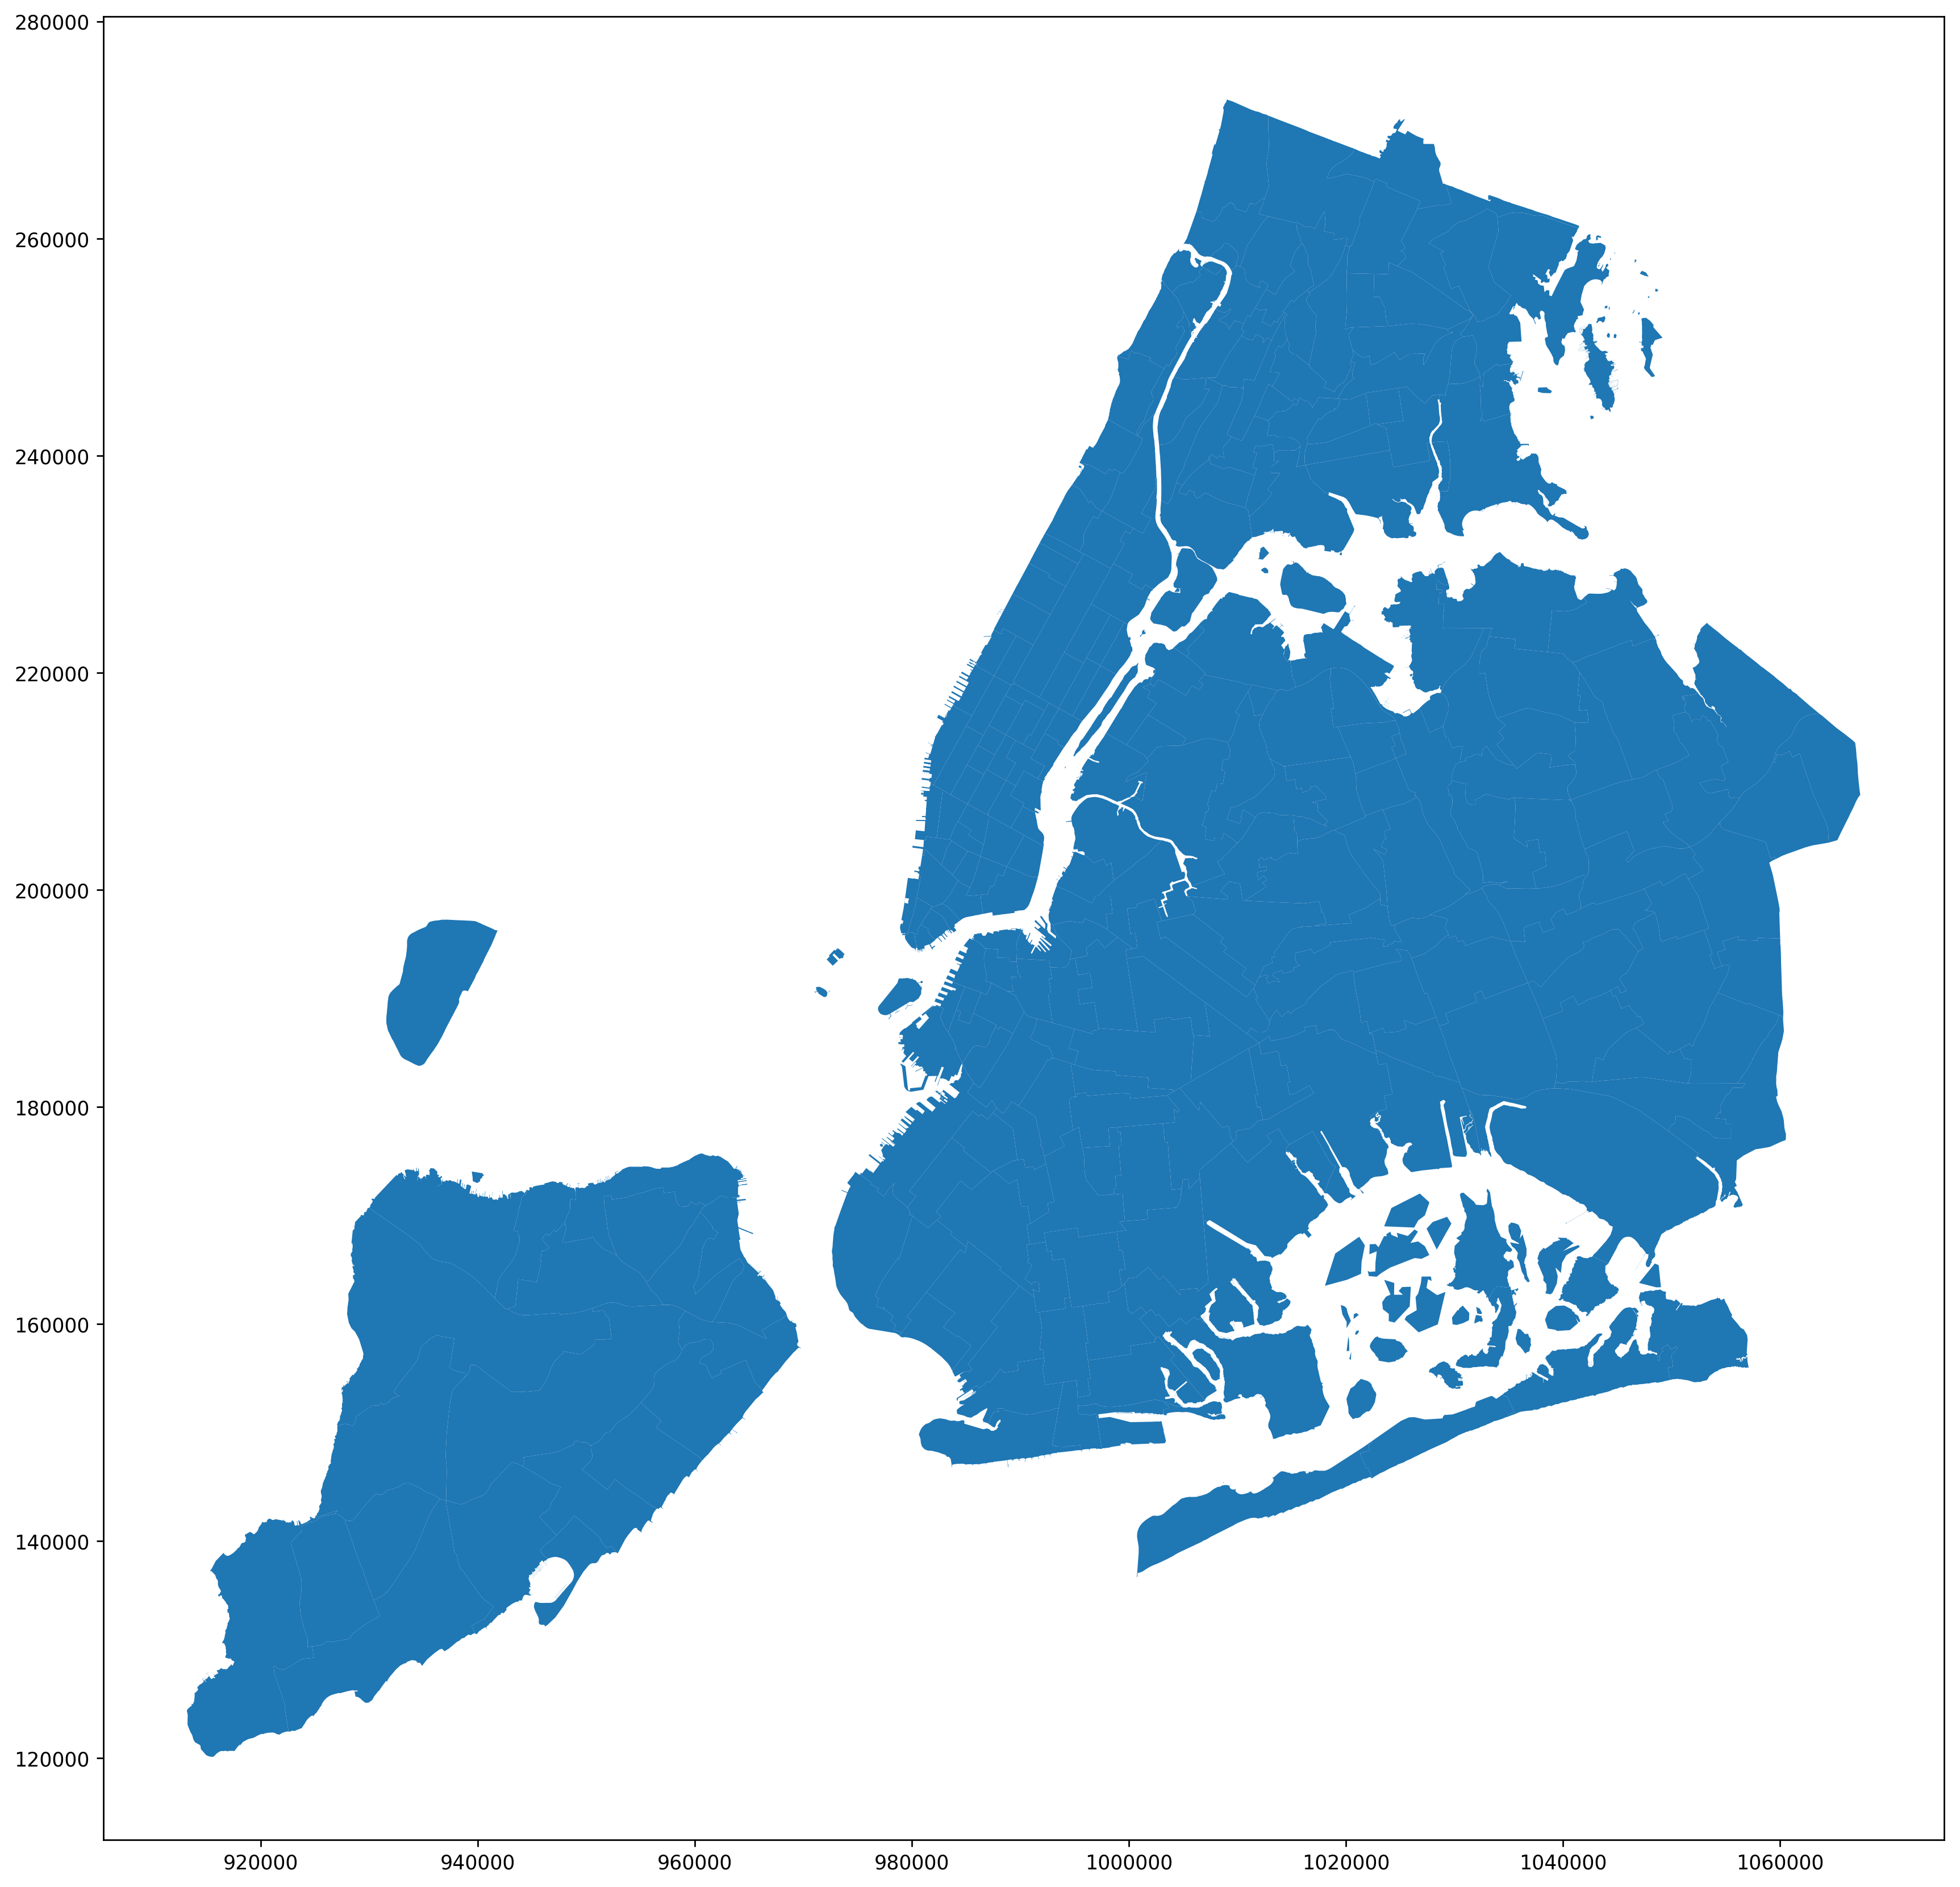

In [91]:
datos_mapa_shp.plot(alpha = 1)

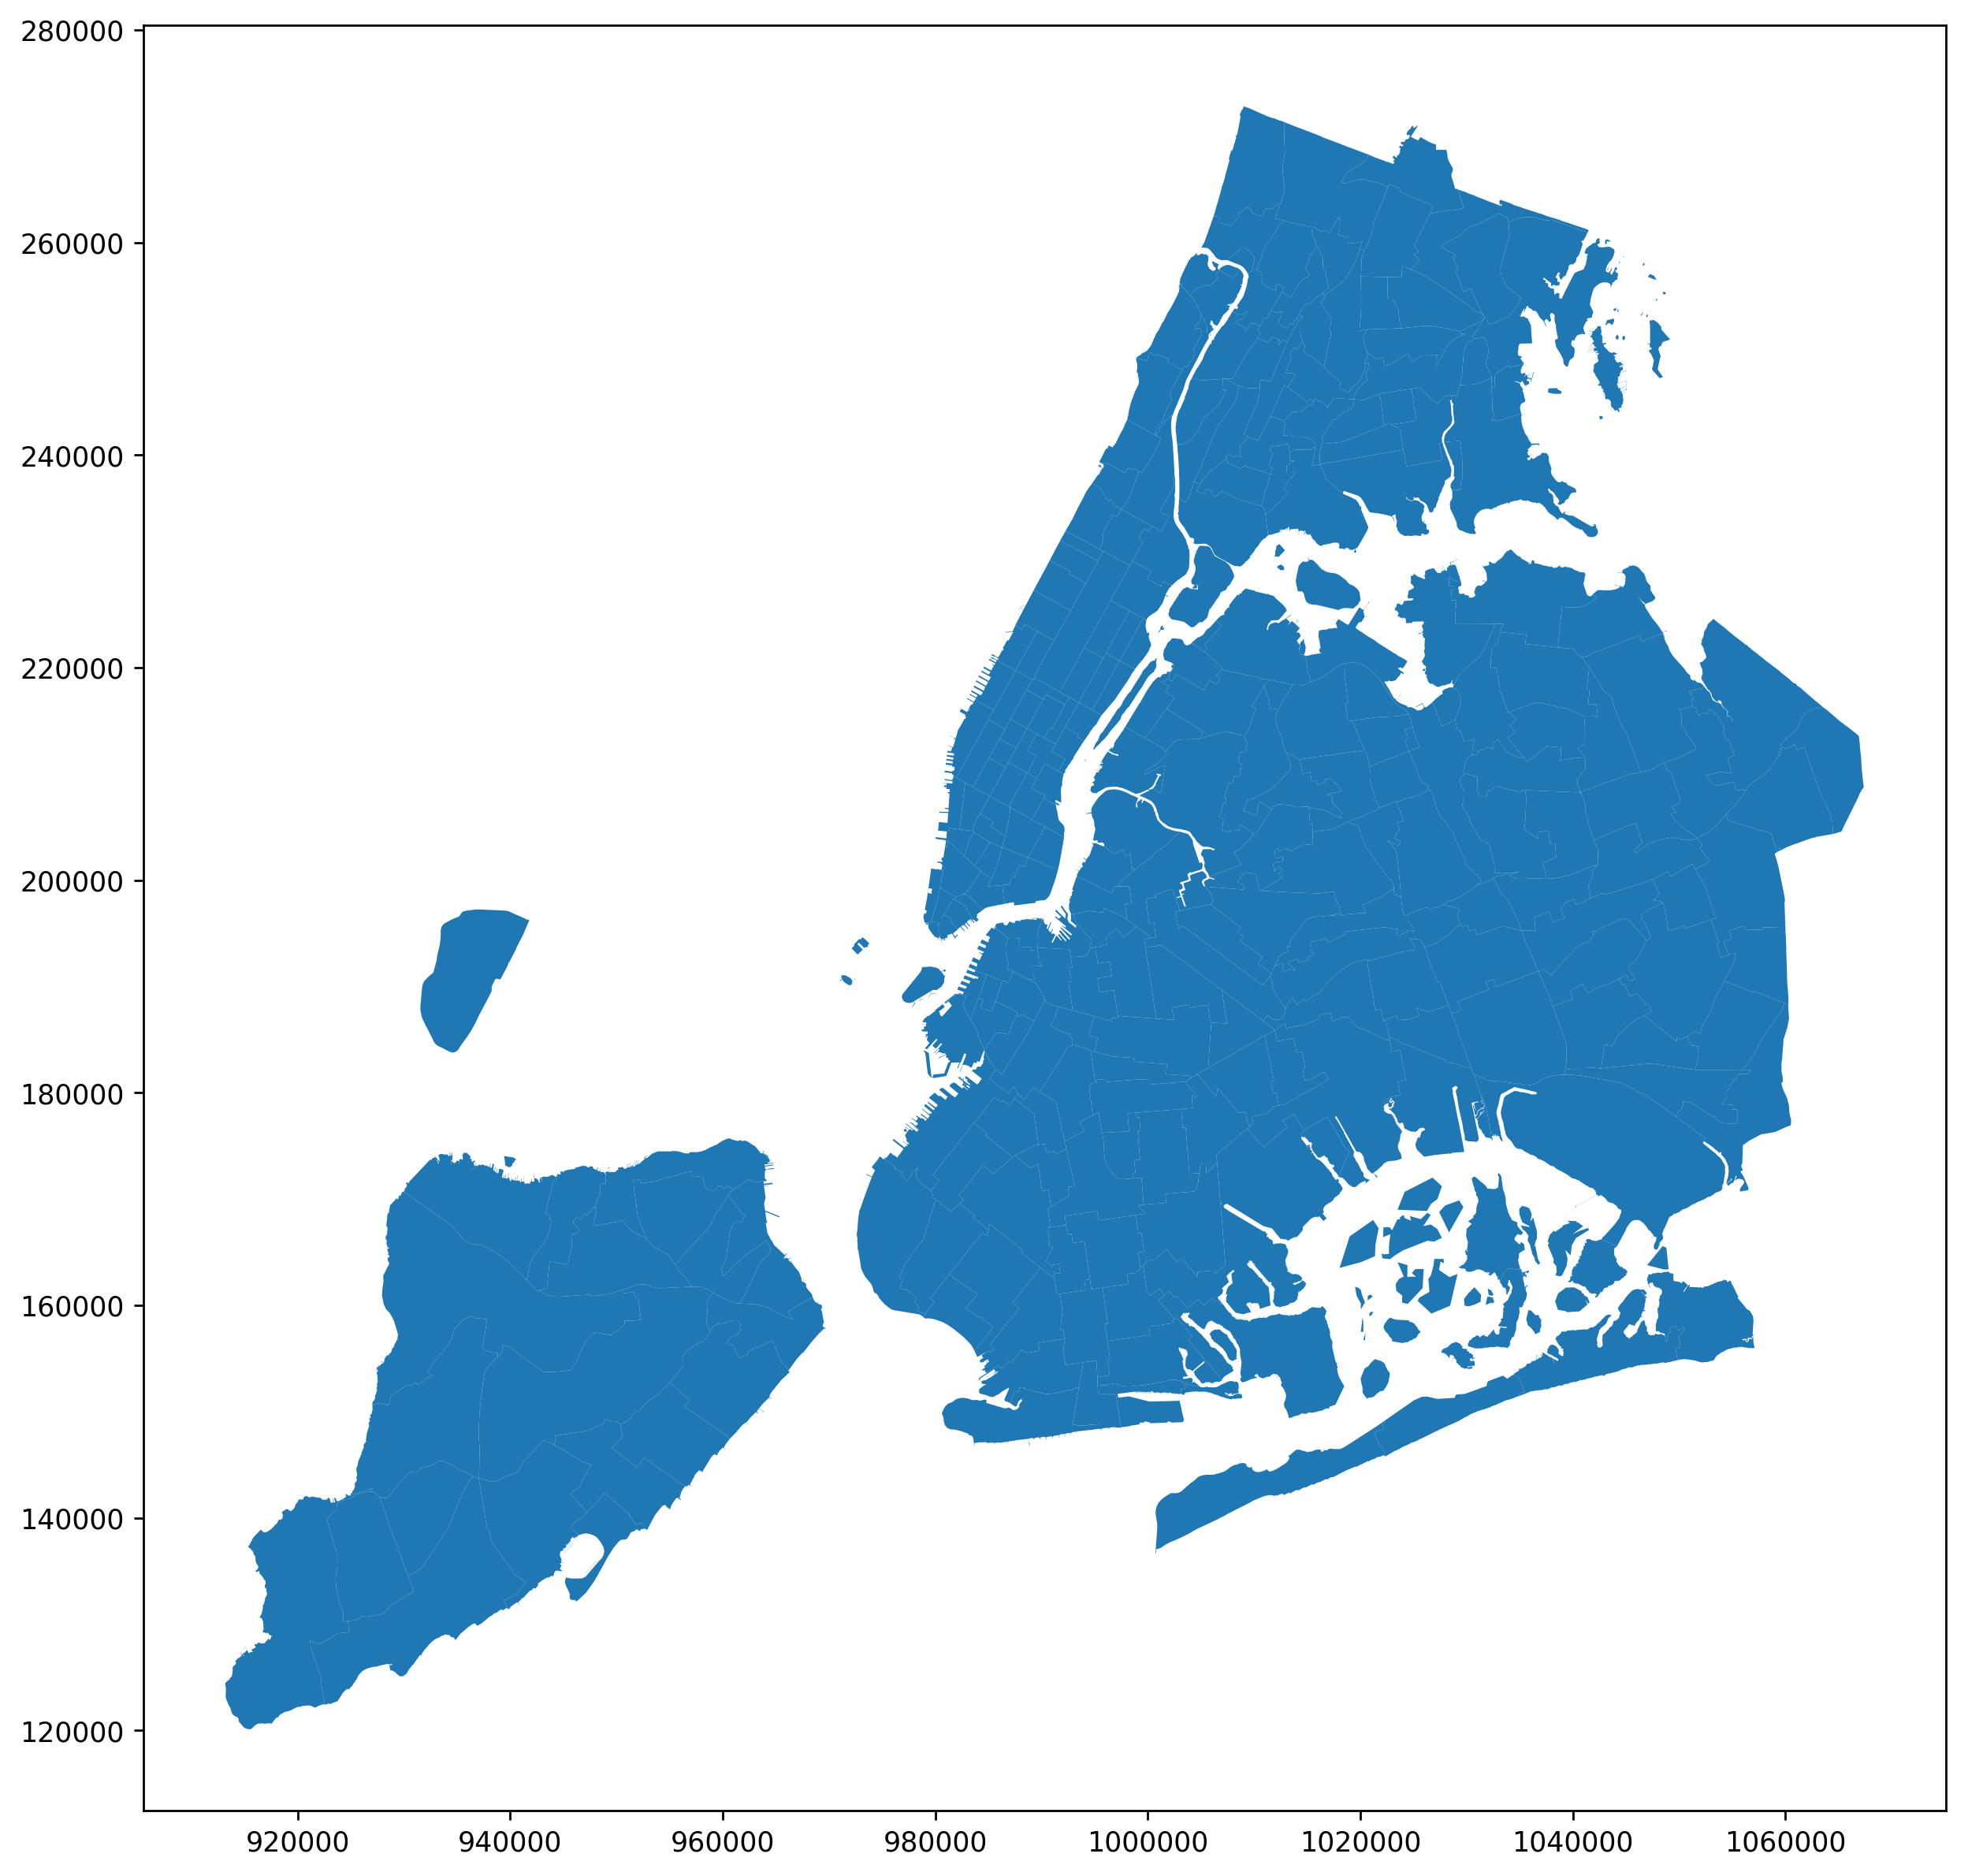

In [94]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = datos_mapa_shp.plot(axes=ax)
plt.show()

# Opcion 2

In [1]:
import shapefile as shp

sf = shp.Reader("/home/michael/Kschool/TFM/Importe_Taxi/taxi_zones/taxi_zones.shp")

In [2]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

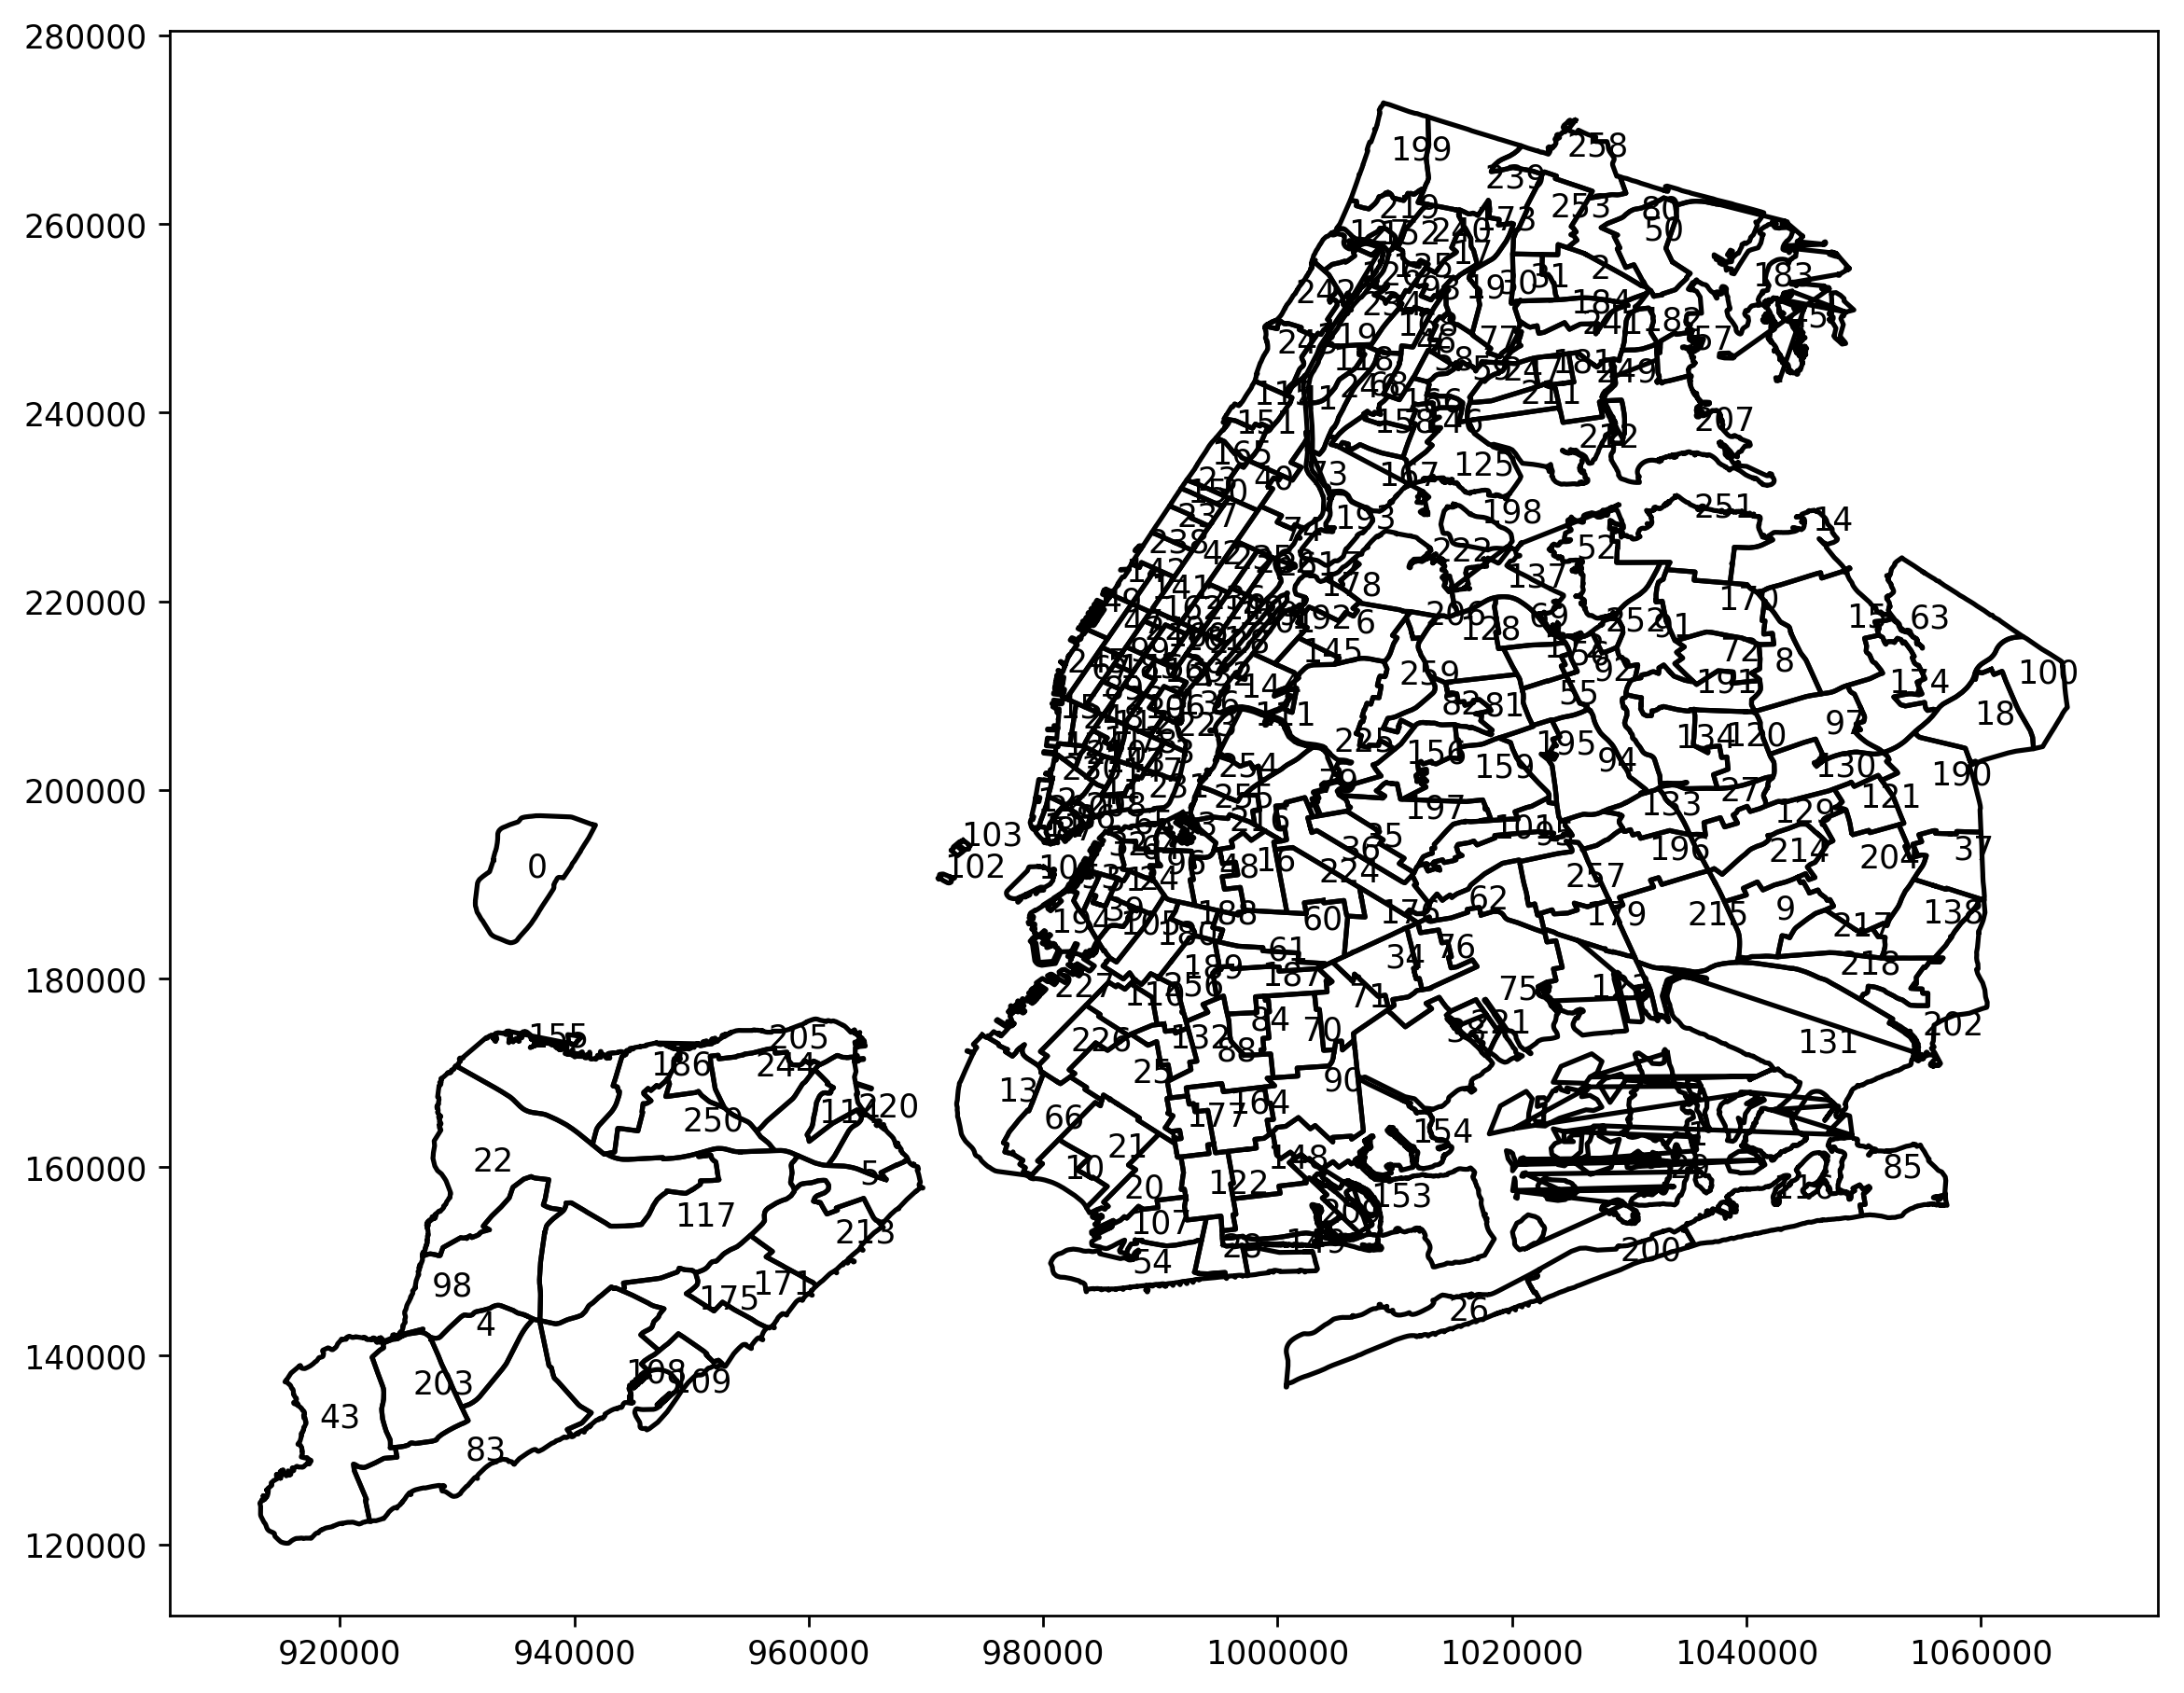

In [8]:
plot_map(sf)

In [38]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]

    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df

In [36]:
import seaborn as sns

def calc_color(data, color=None):
    if color   == 1: 
        color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0', '#807dbaF0','#6a51a3F0','#54278fF0']; 
        colors = 'Purples';
    elif color == 2:
        color_sq = ['#c7e9b4','#7fcdbb','#41b6c4', '#1d91c0','#225ea8','#253494']; 
        colors = 'YlGnBu';
    elif color == 3: 
        color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd', '#969696','#636363','#252525']; 
        colors = 'Greys';
    elif color == 9: 
        color_sq = ['#ff0000','#ff0000','#ff0000', '#ff0000','#ff0000','#ff0000']
    else:
        color_sq = ['#ffffd4','#fee391','#fec44f', '#fe9929','#d95f0e','#993404'];        
        colors = 'YlOrBr';
    new_data, bins = pd.qcut(data, 6, retbins=True, labels=list(range(6)))
    color_ton = []
    for val in new_data:
        color_ton.append(color_sq[val]) 
    if color != 9:
        colors = sns.color_palette(colors, n_colors=6)
        sns.palplot(colors, 0.6);
    for i in range(6):
        print ("\n"+str(i+1)+': '+str(int(bins[i]))+" => "+str(int(bins[i+1])-1), end =" ")
        print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [19]:
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [49]:
def plot_comunas_data(sf, title, comunas, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        comuna_id.append(df[df.zone == i].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));

In [48]:
df.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                             coords  
0            EWR  [(933100.9183527103, 192536.08569720192), (933...  
1         Queens  [(1033269.2435912937, 172126.0078125), (103343...  
2          Bronx  [(1026308.7695066631, 256767.6975403726), (102...  
3      Manhattan  [(992073.4667968601, 203714.07598876953), (992...  
4  Staten Island  [(935843.3104932606, 144283.33585065603), (936...

In [30]:
len(south)

263


1: 0 => -1 

   1   2   3   4   5   6


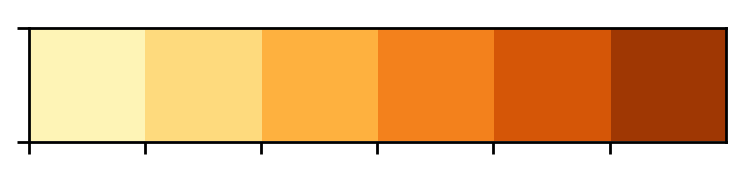

<Figure size 2750x2250 with 0 Axes>

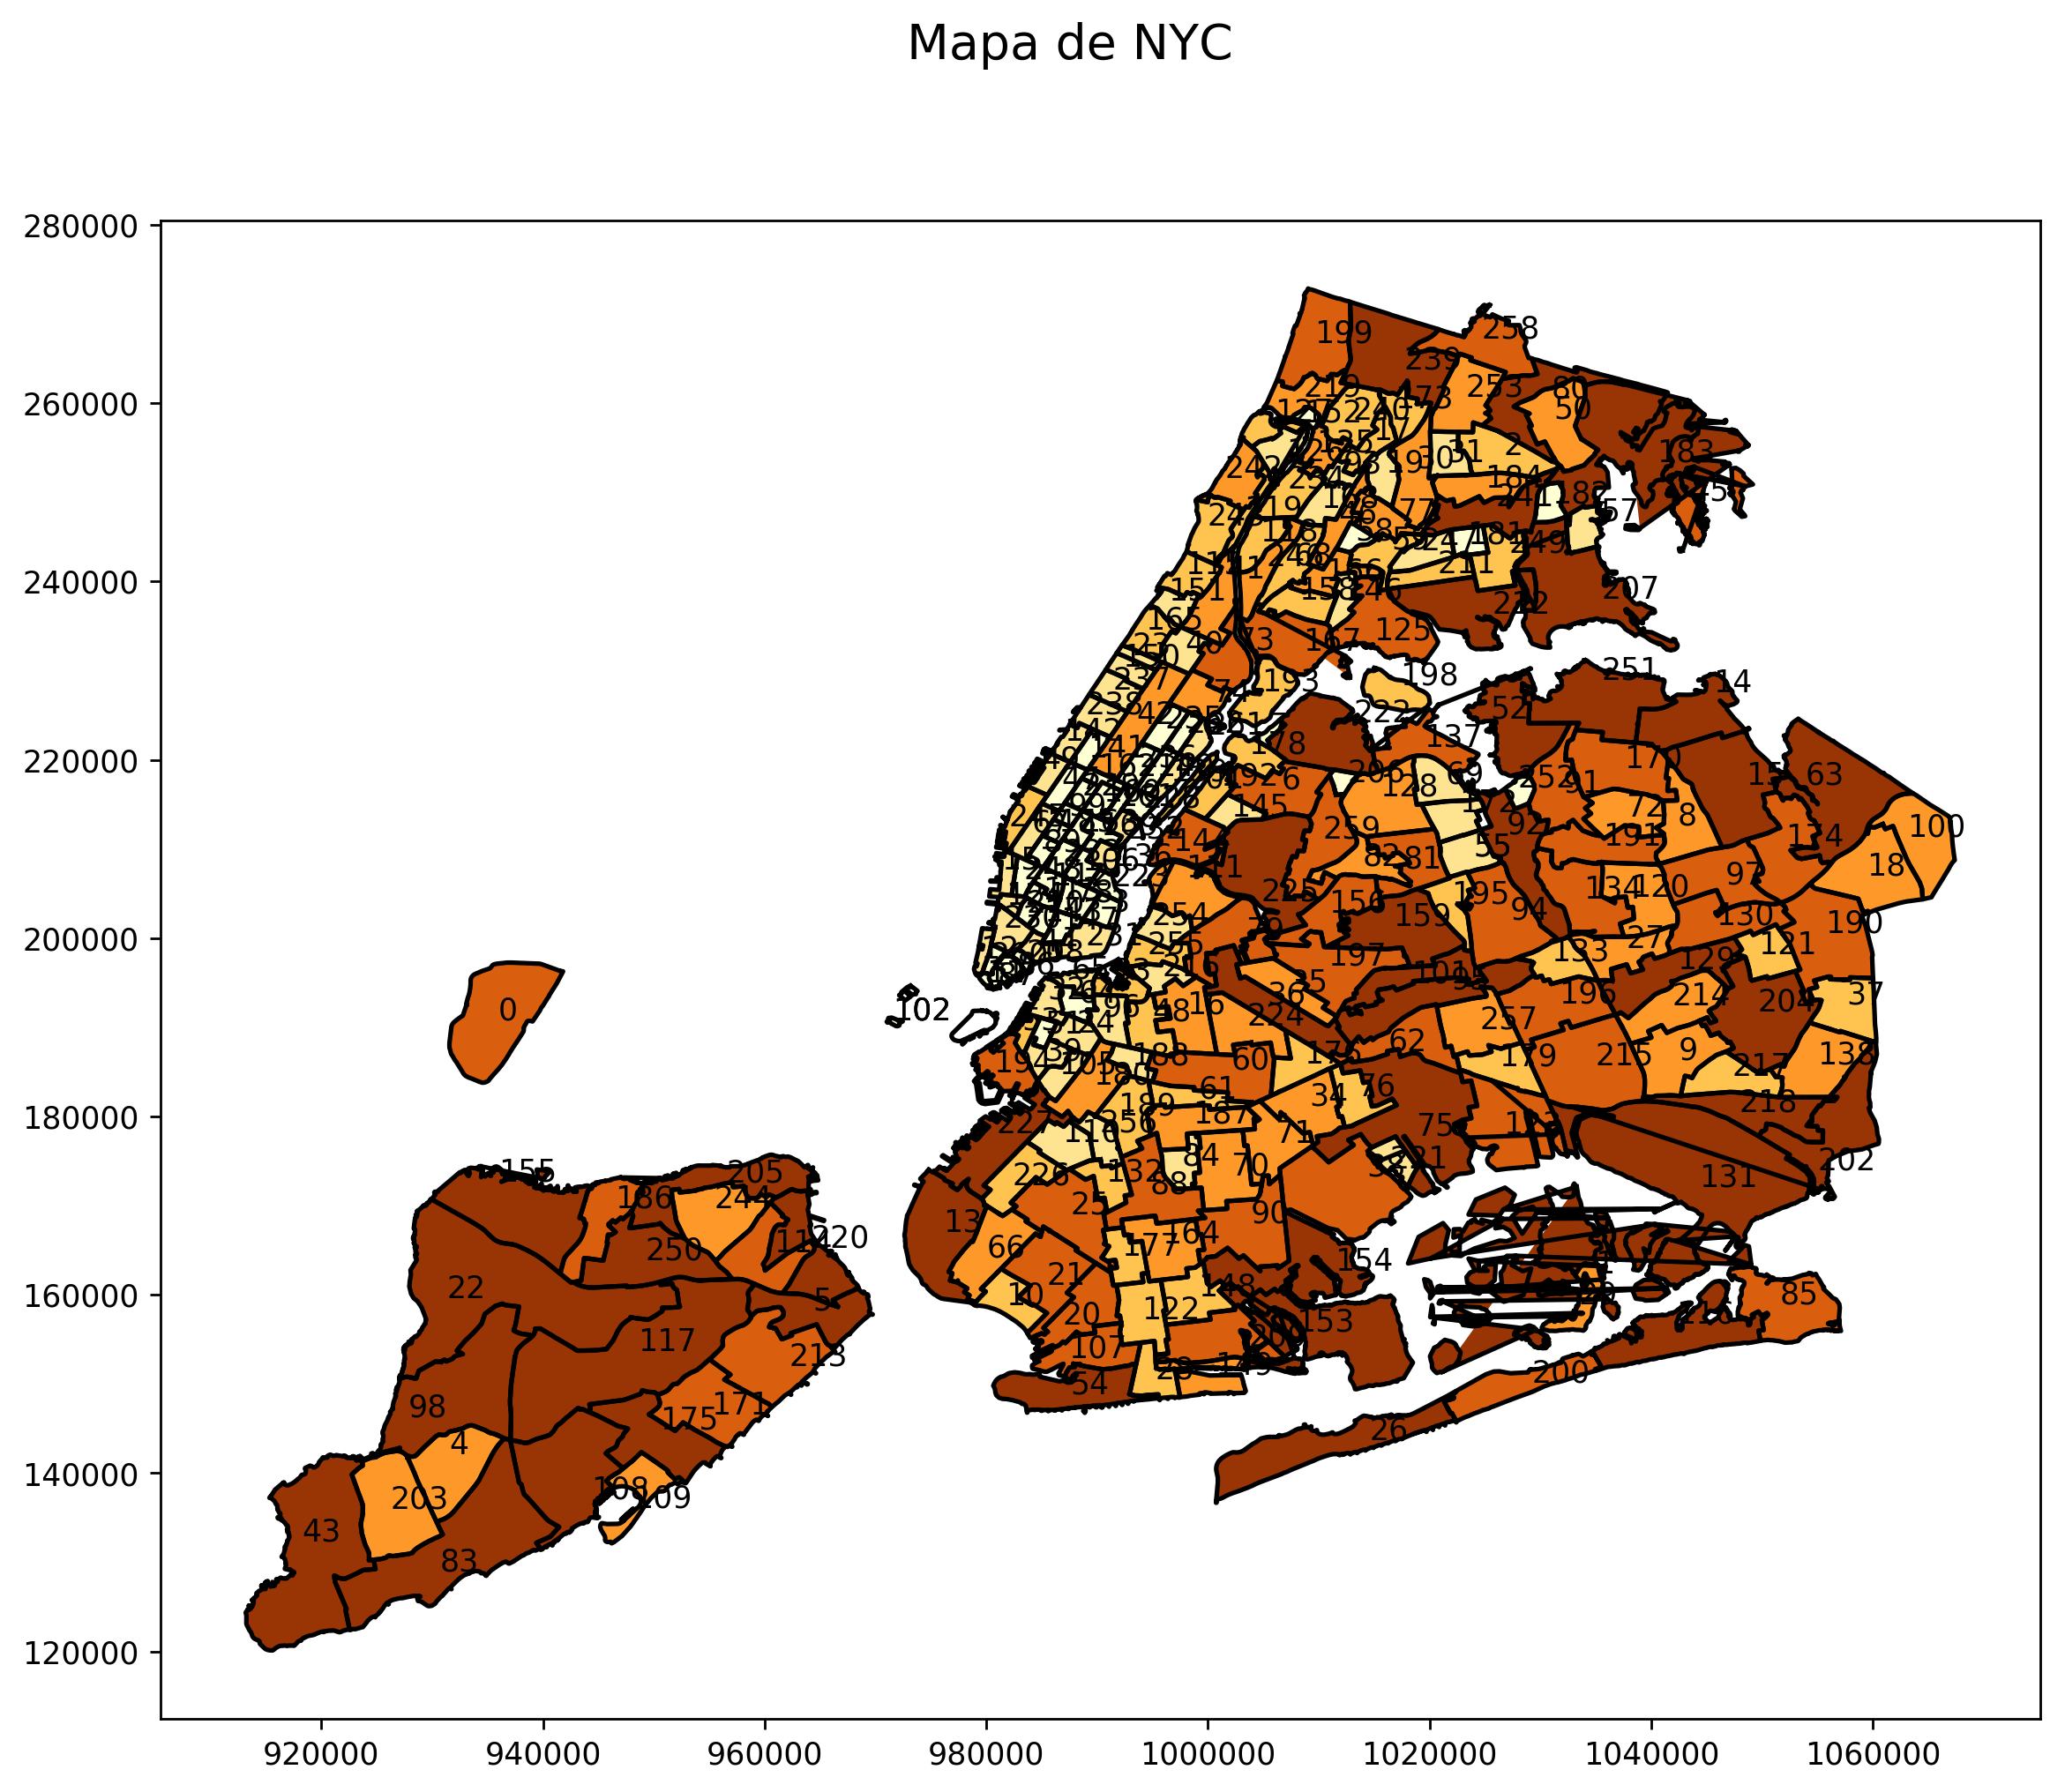

In [51]:
title = "Mapa de NYC"
names = list(df["zone"])
data = list(df["Shape_Leng"])

plot_comunas_data(sf,title,names, data, 4, True)

In [28]:
import json # or import geojson
with open("/home/michael/Kschool/TFM/Importe_Taxi/NYC_Taxi_Zones.geojson") as json_file:
    json_data = json.load(json_file)

In [76]:
geometry = []
for element in list(json_data.values())[1]:
    geometry.append(element["geometry"])

In [57]:
datos_map.head()

coordinates          type
0  [[[[-74.18445299999996, 40.694995999999904], [...  MultiPolygon
1  [[[[-73.82337597260663, 40.63898704717672], [-...  MultiPolygon
2  [[[[-73.84792614099985, 40.87134223399991], [-...  MultiPolygon
3  [[[[-73.97177410965318, 40.72582128133706], [-...  MultiPolygon
4  [[[[-74.17421738099989, 40.5625680859999], [-7...  MultiPolygon

In [86]:
datos_map = geometry[0]

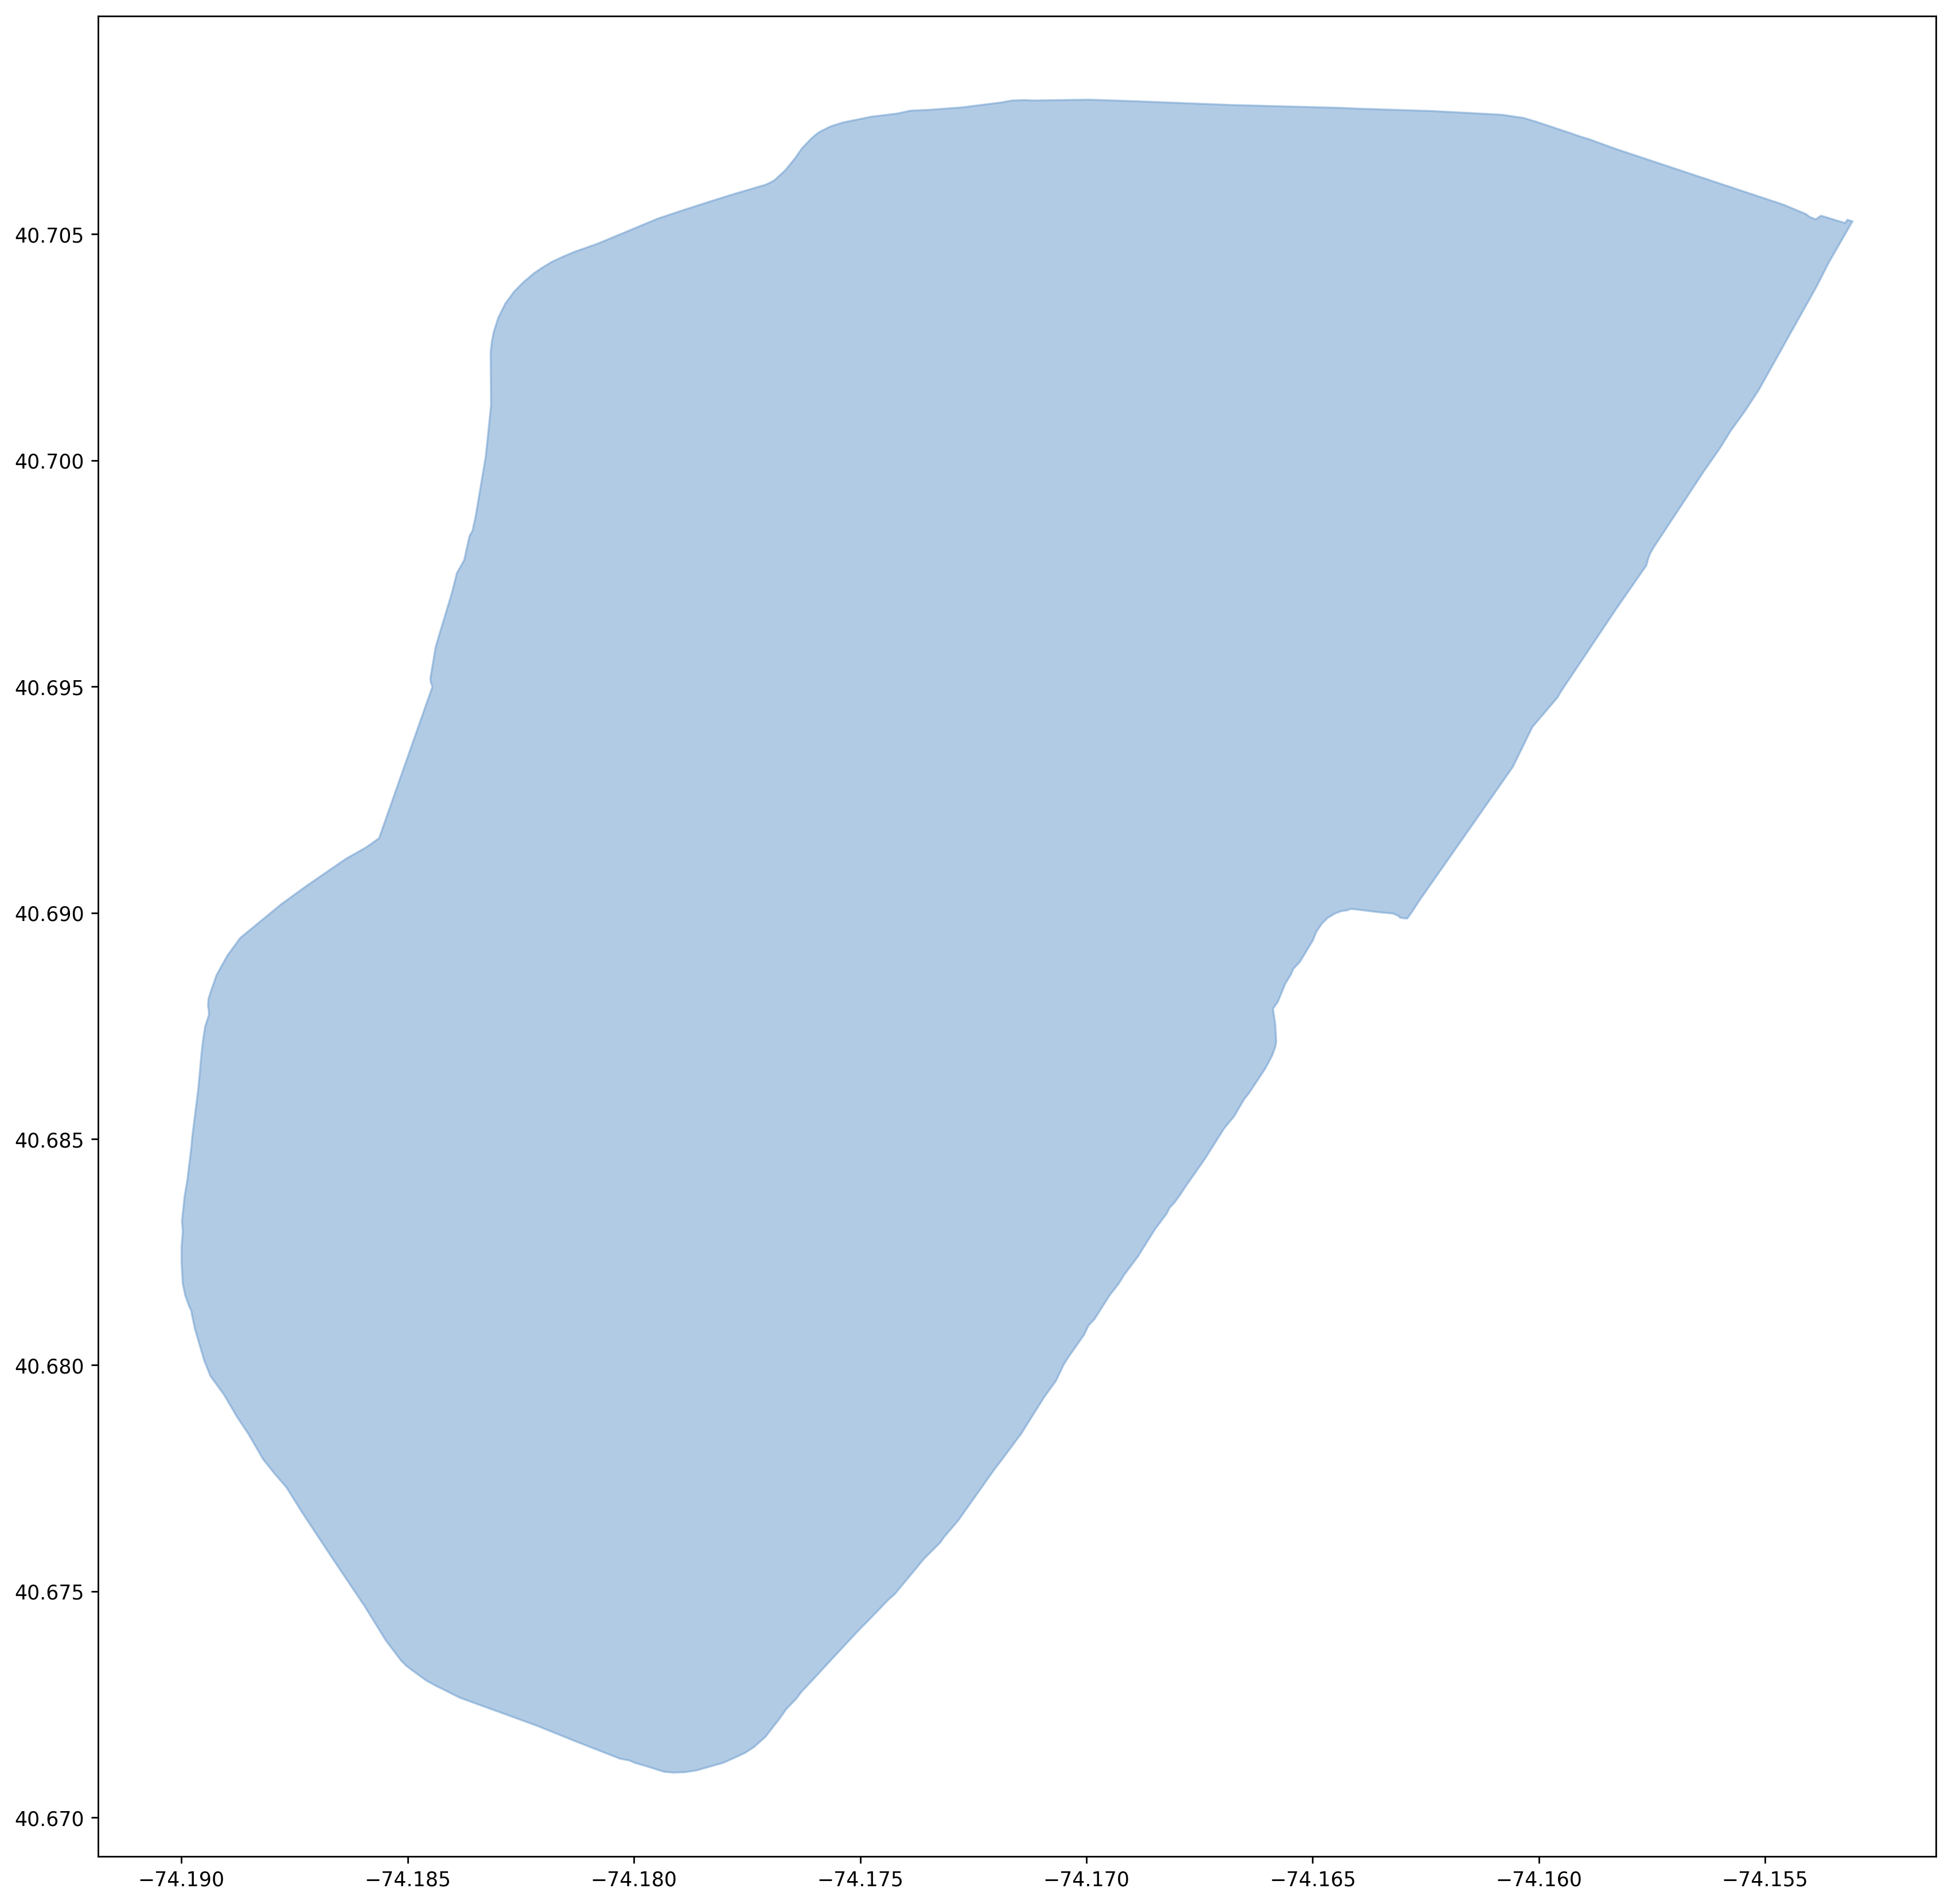

In [87]:
from descartes import PolygonPatch
BLUE = '#6699cc'
fig = plt.figure()
ax = fig.gca()
ax.add_patch(PolygonPatch(datos_map, fc=BLUE, ec=BLUE, alpha=0.5, zorder=2 ))
ax.axis('scaled')
plt.show()